In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, prepare_nway_results
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in photometric prior mode

 (autocalibration but of all available nnmags per source -> spurious information enhancement!!!)

In [3]:
magnitude_columns = [
                    ('nnmag_grz_orig', 'auto'),
                    ('nnmag_grzw1_orig', 'auto'),
                    ('nnmag_grzw1w2_orig', 'auto'),
                    ('rel_dered_mag_g_orig', 'auto'),
                    ('rel_dered_mag_r_orig', 'auto'),
                    ('rel_dered_mag_z_orig', 'auto'),
                    ('rel_dered_g_r_orig', 'auto'),
                    ('rel_dered_r_z_orig', 'auto'),
                    ('rel_dered_g_z_orig', 'auto'),
                    ]



ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns = magnitude_columns)

nway_args = {'match_radius':30, 'prior_completeness':1, 'mag_include_radius': 3.0,
'store_mag_hists': True,}


    adding angular separation columns
matching: 145071 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:02<00:00, 3345.22it/s]
Incorporating bias "DESI:nnmag_grz_orig" ...
magnitude histogram of column "DESI_nnmag_grz_orig": 8481 secure matches, 10156 insecure matches and 1744033 secure non-matches of 2418574 total entries (1752514 valid)
magnitude histogram stored to "DESI_nnmag_grz_orig_fit.txt".


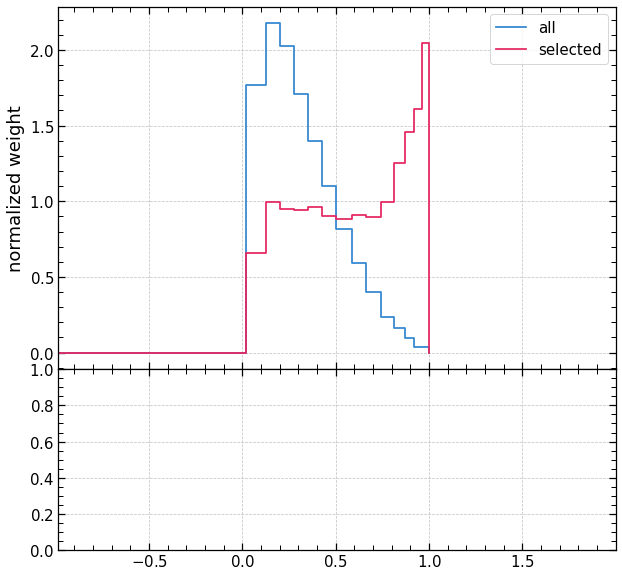

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:nnmag_grzw1_orig" ...
magnitude histogram of column "DESI_nnmag_grzw1_orig": 7570 secure matches, 10156 insecure matches and 1180248 secure non-matches of 2418574 total entries (1187818 valid)
magnitude histogram stored to "DESI_nnmag_grzw1_orig_fit.txt".


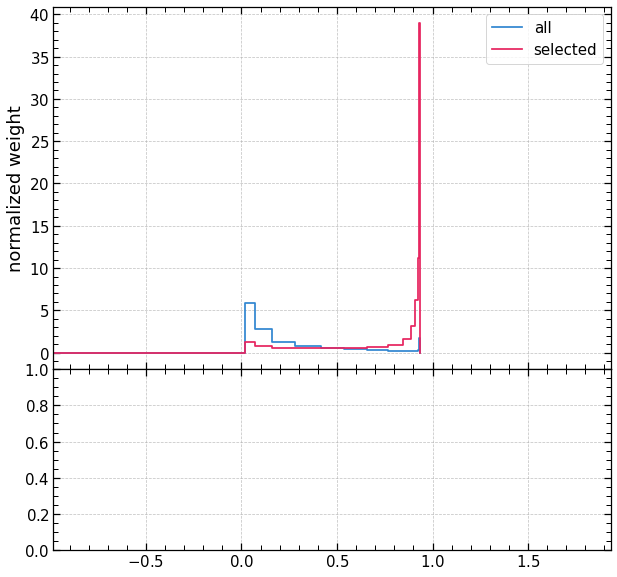

Incorporating bias "DESI:nnmag_grzw1w2_orig" ...
magnitude histogram of column "DESI_nnmag_grzw1w2_orig": 6822 secure matches, 10156 insecure matches and 716703 secure non-matches of 2418574 total entries (723525 valid)
magnitude histogram stored to "DESI_nnmag_grzw1w2_orig_fit.txt".


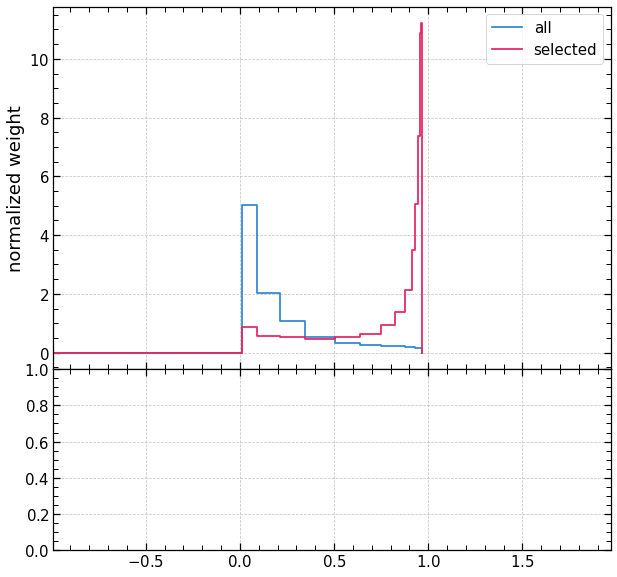

Incorporating bias "DESI:rel_dered_mag_g_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_g_orig": 8960 secure matches, 10156 insecure matches and 1982975 secure non-matches of 2418574 total entries (1991935 valid)
magnitude histogram stored to "DESI_rel_dered_mag_g_orig_fit.txt".


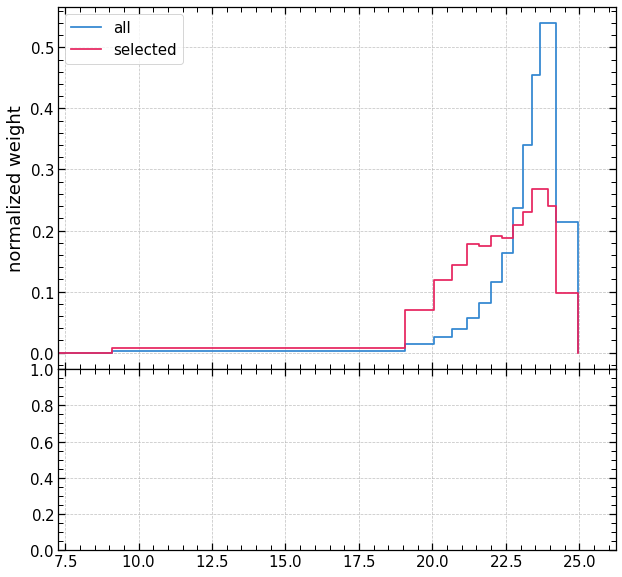

Incorporating bias "DESI:rel_dered_mag_r_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_r_orig": 9434 secure matches, 10156 insecure matches and 2120176 secure non-matches of 2418574 total entries (2129610 valid)
magnitude histogram stored to "DESI_rel_dered_mag_r_orig_fit.txt".


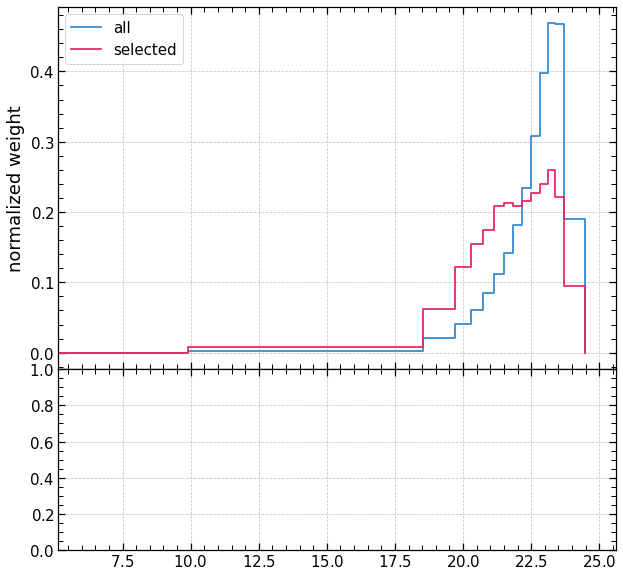

Incorporating bias "DESI:rel_dered_mag_z_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_z_orig": 9756 secure matches, 10156 insecure matches and 2249949 secure non-matches of 2418574 total entries (2259705 valid)
magnitude histogram stored to "DESI_rel_dered_mag_z_orig_fit.txt".


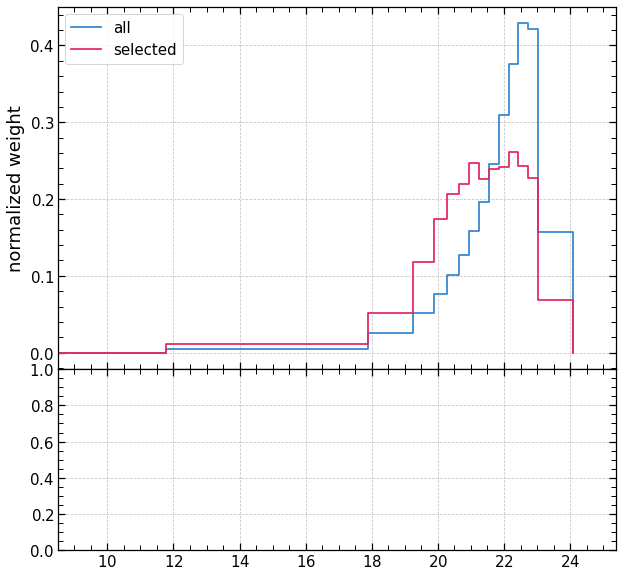

Incorporating bias "DESI:rel_dered_g_r_orig" ...
magnitude histogram of column "DESI_rel_dered_g_r_orig": 8735 secure matches, 10156 insecure matches and 1860386 secure non-matches of 2418574 total entries (1869121 valid)
magnitude histogram stored to "DESI_rel_dered_g_r_orig_fit.txt".


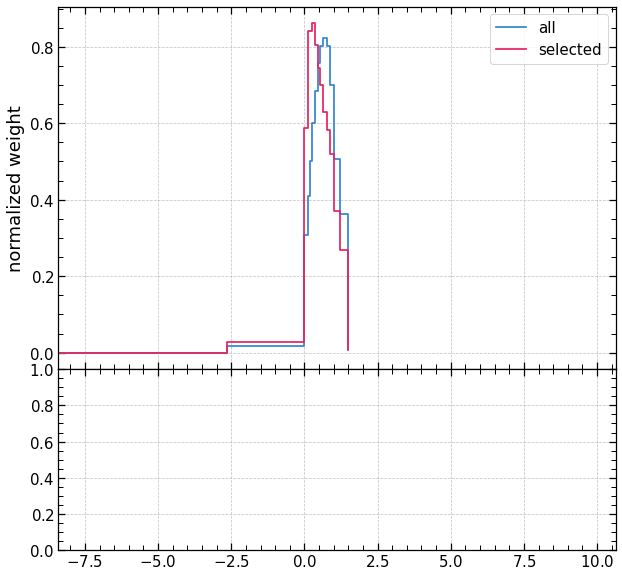

Incorporating bias "DESI:rel_dered_r_z_orig" ...
magnitude histogram of column "DESI_rel_dered_r_z_orig": 9163 secure matches, 10156 insecure matches and 1996373 secure non-matches of 2418574 total entries (2005536 valid)
magnitude histogram stored to "DESI_rel_dered_r_z_orig_fit.txt".


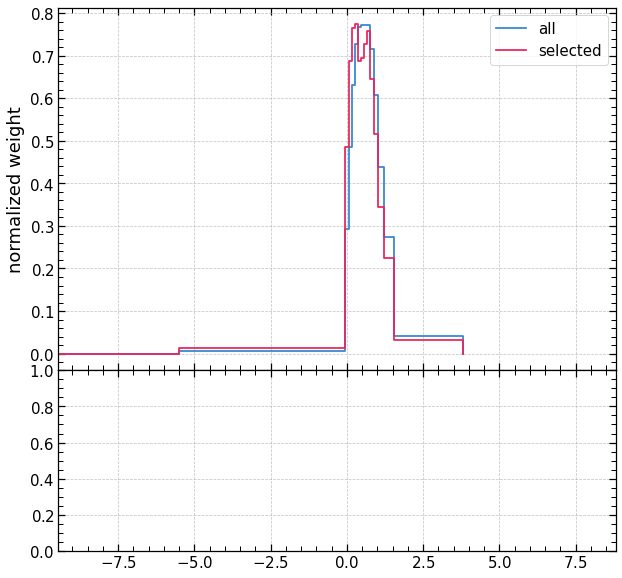

Incorporating bias "DESI:rel_dered_g_z_orig" ...
magnitude histogram of column "DESI_rel_dered_g_z_orig": 8639 secure matches, 10156 insecure matches and 1832581 secure non-matches of 2418574 total entries (1841220 valid)
magnitude histogram stored to "DESI_rel_dered_g_z_orig_fit.txt".


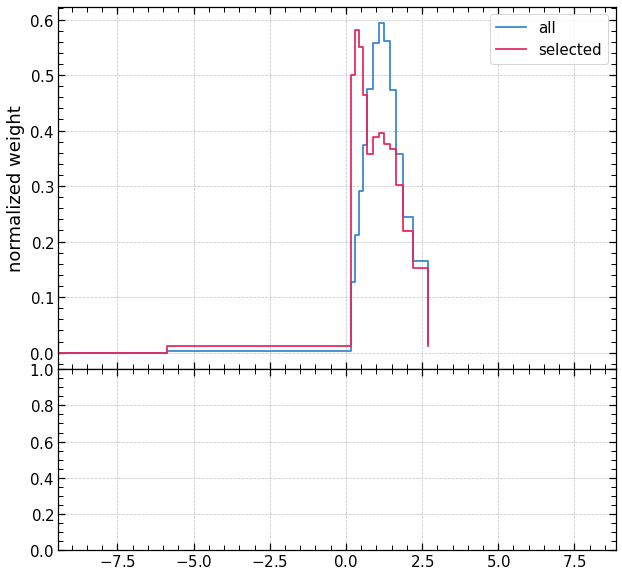


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [4]:

nway_res_orig = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

# nway_res_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#nway.calibrate_cutoff(nway_res, nway_res_random);

In [5]:
os.system('rm DESI*_fit.txt')

0